<a href="https://colab.research.google.com/github/YuXia-SR/DS_RL/blob/main/Lab_3_Bag_of_Words_and_TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2 Supplement: Rule Based POS Tagging

In [ ]:
import nltk
from nltk.text import Text
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# lexical tagger

headline = "Eileen Gu scores Gold in Beijing with a 1620 spin."
text = word_tokenize(headline)
nltk.pos_tag(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Eileen', 'JJ'),
 ('Gu', 'NNP'),
 ('scores', 'NNS'),
 ('Gold', 'NNP'),
 ('in', 'IN'),
 ('Beijing', 'NNP'),
 ('with', 'IN'),
 ('a', 'DT'),
 ('1620', 'CD'),
 ('spin', 'NN'),
 ('.', '.')]

List of tags and their meaning: https://stackoverflow.com/questions/15388831/what-are-all-possible-pos-tags-of-nltk

In [ ]:
# rule-based tagging (if-then statements)

tags = []
i = 0
for token in word_tokenize(headline):
  tag = 'UNK'
  if token == 'Eileen':
    tag = 'NNP'
  if token == 'Gu':
    tag = 'NNP'
  if len(tags) > 1:
    if tags[i-1] == 'NNP':
      tag = 'VB'
  if token == 'Beijing':
    tag = 'LOC'
  if token.isnumeric():
    tag = 'CD'
  tags.append(tag)
  i+= 1

for i in range(len(tags)):
  print(word_tokenize(headline)[i], tags[i])

Eileen NNP
Gu NNP
scores VB
Gold UNK
in UNK
Beijing LOC
with UNK
a UNK
1620 CD
spin UNK
. UNK


# Lab 3: BoW, tf-idf, Cosine Similarity, KWIC, Dispersion, Lexical Diversity + Compleixty

### importing Ted Cruz data

In [ ]:
import os
from bs4 import BeautifulSoup
data = []
for source in os.listdir('./'):
  if '.txt' in source:
    with open('./' + source, 'rb') as file:
          print(source)
          text = file.read()
          
          # clean html
          soup = BeautifulSoup(text)
          clean_text = soup.get_text()
          clean_text = clean_text.replace(u'\xa0', u' ')
          print(clean_text)
          data.append([source.replace('.txt', ''), clean_text])

fox.txt
Sen. Ted Cruz flew to Cancun, Mexico, with his family this week as Texas dealt with a winter storm that as of Thursday still has left 500,000 without power, Fox News has confirmed. 

After the trip became public, Cruz released a statement and said he planned to fly back to the U.S. on Thursday afternoon.

Photographs of Cruz, R-Texas, at an airport began circulating on social media late Wednesday, with critics slamming the senator for leaving the state for Cancun amid a major crisis.

Cruz addressed the trip in a statement on Thursday afternoon.

"With school cancelled for the week, our girls asked to take a trip with friends," he said. "Wanting to be a good dad, I flew down with them last night and am flying back this afternoon. My staff and I are in constant communication with state and local leaders to get to the bottom of what happened in Texas. We want our power back, our water on, and our homes warm. My team and I will continue using all our resources to keep Texans infor

In [ ]:
data[2]

['epoch',
 'Sen. Ted Cruz (R-Texas) responded to allegations that he flew to Cancun, Mexico, in the midst of record cold temperatures and snowfall in Texas—which has been besieged by power outages over the past several days.\nCruz appeared to confirm that he went to Cancun, saying that “with school canceled for the week, our girls asked to take a trip with friends. Wanting to be a good dad, I flew down with them last night and am flying back this afternoon.”\n“My staff and I are in constant communication with state and local leaders to get to the bottom of what happened in Texas,” he said in a statement on Thursday, referring to the power outages and, in some cases, loss of water.\nHe said that Texans “want our power back, our water on, and our homes warm.”\nIt came as photos circulating on social media showed a man who resembles Cruz in the airport in Cancun. Another photo showed a man resembling the Texas senator on a plane. Several news outlets, including Fox News, The Associated Pr

In [ ]:
print(data[7])

['wsj', 'Nobody likes Ted Cruz. This is conventional wisdom in Washington. While not technically true — his family members like him, presumably, and his approval rating among Texas Republicans last month was 76 percent — it feels essentially true. Maybe it’s the exhausting smarm, the squirrelly ambition, the hollow theatrics. Maybe it’s how he tried to block relief aid after Hurricane Sandy, or how he helped to shut down the government in 2013. The Victorian facial hair hasn’t helped; it lends an incongruous quality of statesmanship to a man viewed by his colleagues as a pest.\n\n“Lucifer in the flesh,” Republican John A. Boehner, the former speaker of the House, called him in 2016.\n“If you killed Ted Cruz on the floor of the Senate, and the trial was in the Senate, nobody would convict you,” Sen. Lindsey O. Graham (R-S.C.) said in 2016.\n\n\nSaid Democrat Al Franken in 2017, when he was still in the Senate: “I probably like Ted Cruz more than most of my colleagues like Ted Cruz, and 

In [ ]:
# process film review function
def process_text(text):
    clean_text = text
    
    # 1. Cleaning
    clean_text = BeautifulSoup(clean_text).get_text()
    clean_text = clean_text.lower()
    
    # 2. tokenizing
    tokens = word_tokenize(clean_text)
    
    # 2.1 stopwords, punctuation
    from nltk.corpus import stopwords
    stopwords = stopwords.words('english')
    stopwords.remove('not')

    clean_tokens = []
    for token in tokens:
        if token not in stopwords and token.isalpha():
            clean_tokens.append(token)
   
    return clean_tokens

## Key Words in Context (KWIC)

In [ ]:
corpus = [article for source, article in data]
sources = [source for source, article in data]

doc = corpus[7]

In [ ]:

tokenizer = nltk.tokenize.WhitespaceTokenizer()
t = Text(tokenizer.tokenize(doc))
t.concordance('Cruz')

Displaying 12 of 12 matches:
lled him in 2016. “If you killed Ted Cruz on the floor of the Senate, and the 
 in the Senate: “I probably like Ted Cruz more than most of my colleagues like
ed Cruz. This was the place that Ted Cruz was starting from earlier this week.
n the Yucatán Peninsula. “Not good,” Cruz tweeted early Tuesday evening about 
y then, the pastime of disliking Ted Cruz would become sport. “As far as I’m c
ist David Shuster tweeted a photo of Cruz headed for his seat, passport appare
an airplane Wednesday afternoon. The Cruz family was headed to Cancun, Shuster
rmation. The evidence suggested that Cruz was in an Economy Plus seat, with pl
ght out Thursday afternoon. And then Cruz released a statement confirming the 
 asked to take a trip with friends,” Cruz wrote, mentioning the direness of th
ghters, I had to go to Cancun. “Cold Cruz Flees to Cancun Amid Crisis!” was th
er. “This is not the time to relax.” Cruz joined this tradition Wednesday, esc


## Dispersion Plots

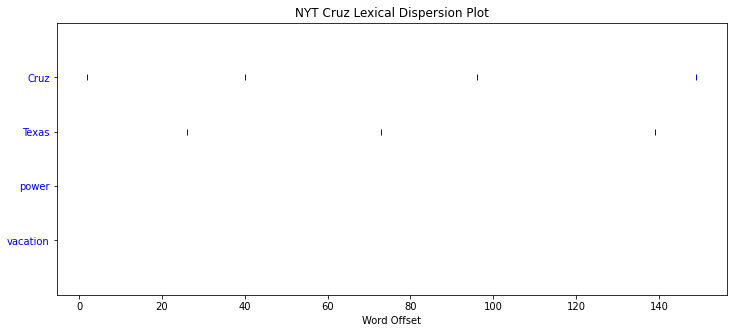

In [ ]:
from nltk.draw.dispersion import dispersion_plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,5))
targets = ['Cruz', 'Texas', 'power', 'vacation']

tok_doc = tokenizer.tokenize(corpus[3])

dispersion_plot(tok_doc, targets, ignore_case = True, title='NYT Cruz Lexical Dispersion Plot')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


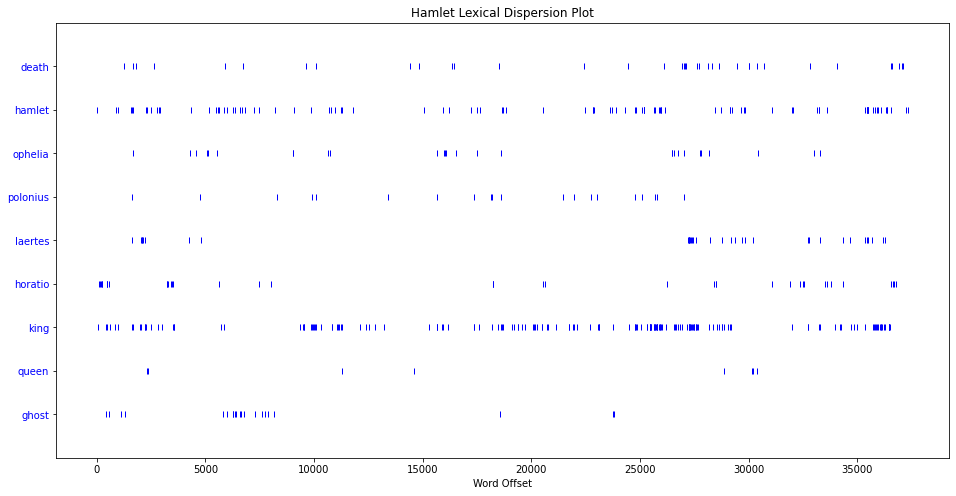

In [ ]:
nltk.download('gutenberg')
fig, ax = plt.subplots(figsize=(16,8))

hamlet = nltk.Text(nltk.corpus.gutenberg.words('shakespeare-hamlet.txt'))
targets = ['death', 'hamlet', 'ophelia', 'polonius', 'laertes', 'horatio', 'king', 'queen', 'ghost']
dispersion_plot(hamlet, targets, ignore_case = True, title='Hamlet Lexical Dispersion Plot')

# Bag of Words Models

## Count Vectorizer Model

In [ ]:
corpus = [article for source, article in data]
sources = [source for source, article in data]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

cv = CountVectorizer(stop_words = 'english', min_df = 0.2, ngram_range = (1,2))
corpus_cv = cv.fit_transform(corpus)
feats = cv.get_feature_names()

corpus_array = corpus_cv.toarray()

df = pd.DataFrame(corpus_array, columns = feats, index = sources)
df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,2016,2024,abbott,according,added,adler,afternoon,afternoon staff,airport,allen,allen west,amid,answer,answer constituents,appeared,asked,asked trip,assist,associated,associated press,austin,beach,began,biden,boil,bush,bush intercontinental,cabo,california,calls,came,canceled,canceled week,cancelled,cancelled week,cancun,cancun mexico,cancún,care,care family,...,trump,trying,trying care,tweeted,twitter,united,using,using resources,vacation,ve,ve got,video,want,want power,wanting,wanting good,warm,warm team,washington,water,water homes,weather,wednesday,wednesday afternoon,week,week girls,week texans,weekend,went,west,whereabouts,winter,winter storm,winter storms,work,wouldn,wouldn cruz,wrote,year,york
fox,0,0,0,2,1,0,3,1,1,0,0,2,0,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,3,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,1,1,0,1,1,1,1,0,4,1,1,0,0,0,0,2,1,0,0,0,0,0,0,0
nbc,1,0,0,0,1,1,3,1,4,0,0,0,0,0,0,3,2,2,0,0,1,1,2,0,0,1,1,2,0,0,2,0,0,1,1,1,0,4,1,0,...,1,1,0,2,0,0,1,1,2,2,1,2,3,1,1,1,3,1,1,4,1,0,2,1,4,1,1,2,0,0,0,1,1,0,2,1,1,0,0,0
epoch,0,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,2,2,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,3,1,0,1,1,...,1,1,1,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0,0,5,1,0,0,0,1,1,0,0,1,2,0,1,0,1,1,0,0,0,0,0
OAN,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0
breitbart,0,1,0,1,0,0,3,0,2,1,1,0,2,1,0,2,1,0,2,1,2,0,1,1,1,0,0,0,0,0,0,1,1,0,0,4,0,0,2,1,...,1,1,1,0,0,0,0,0,3,1,0,0,2,1,1,1,1,0,1,9,1,0,2,1,3,0,1,1,0,2,1,5,4,1,0,2,0,2,1,1
hill,0,0,2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,3,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0
nyt,3,2,0,1,1,1,3,0,4,0,0,1,0,0,1,0,0,0,0,0,2,1,0,0,0,1,1,1,1,2,0,0,0,0,0,0,0,6,1,0,...,2,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,2,0,2,7,2,8,0,1,1,0,0,1,0,0,0,1,0,0,4,2,1
wsj,3,0,0,0,0,1,3,0,2,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,1,1,8,0,0,1,1,...,1,2,1,2,1,3,0,0,1,0,0,1,0,0,1,1,0,0,5,0,0,0,2,1,2,1,0,0,2,1,0,1,1,0,0,0,0,1,1,0
cnn,0,0,2,3,0,0,2,0,3,0,0,0,0,0,2,3,2,1,0,0,0,0,0,0,1,2,2,0,0,0,1,0,0,1,1,2,2,2,2,1,...,0,1,0,1,2,0,1,1,0,0,0,0,2,1,1,1,1,1,0,4,1,1,4,1,5,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1
nypost,0,0,0,2,1,0,1,1,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,...,0,1,0,1,0,0,1,1,0,2,1,0,1,1,1,1,1,1,0,2,1,1,0,0,2,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
word_sum_cv = df.sum(axis=0).sort_values(ascending=False)
word_sum_cv

cruz               162
said                75
texas               63
power               60
state               54
                  ... 
including            3
school canceled      3
saturday             3
said think           3
york                 3
Length: 405, dtype: int64

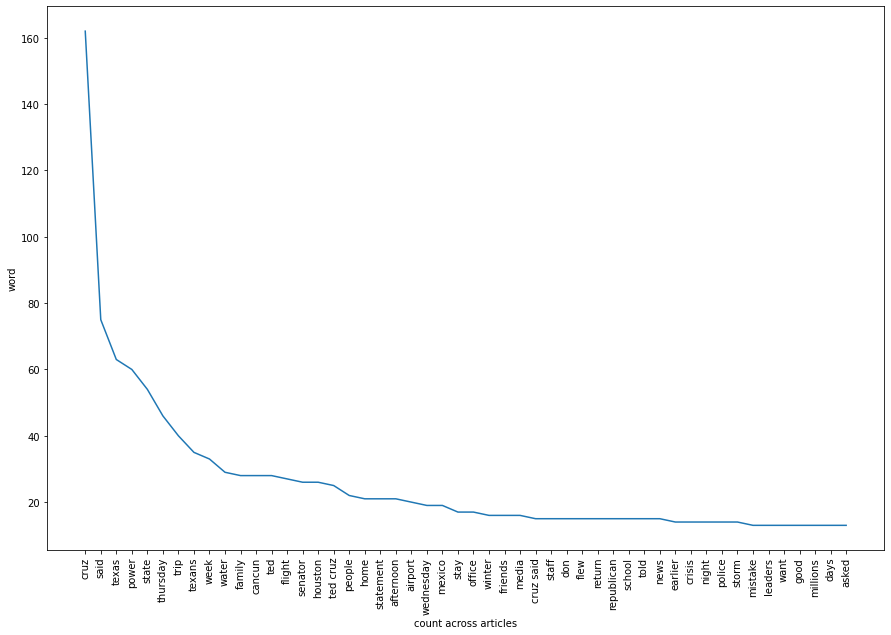

In [ ]:
# Heap's Law in action
fig, ax = plt.subplots(figsize = (15,10))
plt.xticks(rotation = 90)
plt.xlabel("count across articles")
plt.ylabel('word')
plt.plot(word_sum_cv[0:50])

In [ ]:
print('Counts of "Mistake"')
print(df['mistake'])
print('\n')
print('Counts of "Girls"')
print(df['girls'])

Counts of "Mistake"
fox            0
nbc            2
epoch          0
OAN            1
breitbart      4
hill           2
nyt            1
wsj            0
cnn            1
nypost         2
motherjones    0
Name: mistake, dtype: int64


Counts of "Girls"
fox            1
nbc            1
epoch          1
OAN            0
breitbart      0
hill           1
nyt            0
wsj            1
cnn            1
nypost         2
motherjones    1
Name: girls, dtype: int64


## Cosine Similarity

$$ sim(A,B) = \frac{A \bullet B}{\Vert A \Vert \Vert B \Vert} $$

SKlearn has many other implementations of distance functions here: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.pairwise

In [ ]:
pairwise_sim = cosine_similarity(corpus_cv)

In [ ]:
import pandas as pd

pd.DataFrame(pairwise_sim, columns = sources, index = sources)

,fox,nbc,epoch,OAN,breitbart,hill,nyt,wsj,cnn,nypost,motherjones
fox,1.000000,0.706810,0.735724,0.495251,0.717238,0.633056,0.645962,0.614027,0.715730,0.717130,0.683664
nbc,0.706810,1.000000,0.665156,0.484889,0.801168,0.549450,0.795223,0.629671,0.827626,0.584523,0.547254
epoch,0.735724,0.665156,1.000000,0.526736,0.769412,0.621827,0.624143,0.600473,0.671259,0.605426,0.661632
OAN,0.495251,0.484889,0.526736,1.000000,0.582447,0.456519,0.474779,0.462915,0.471939,0.339897,0.493863
breitbart,0.717238,0.801168,0.769412,0.582447,1.000000,0.621069,0.756739,0.681159,0.752778,0.608523,0.669317
hill,0.633056,0.549450,0.621827,0.456519,0.621069,1.000000,0.506279,0.515593,0.511118,0.557640,0.544133
nyt,0.645962,0.795223,0.624143,0.474779,0.756739,0.506279,1.000000,0.734962,0.782775,0.427959,0.641594
wsj,0.614027,0.629671,0.600473,0.462915,0.681159,0.515593,0.734962,1.000000,0.632847,0.406895,0.652160
cnn,0.715730,0.827626,0.671259,0.471939,0.752778,0.511118,0.782775,0.632847,1.000000,0.551705,0.585710
nypost,0.717130,0.584523,0.605426,0.339897,0.608523,0.557640,0.427959,0.406895,0.551705,1.000000,0.534759


## PCA For Simillarity Visualization

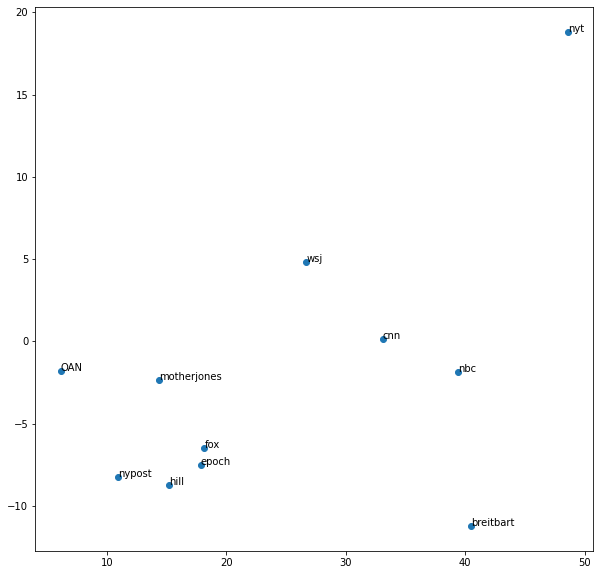

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

svd = TruncatedSVD(n_components=2)
X_r = svd.fit_transform(corpus_cv)

xs = [xs for xs, ys in X_r]
ys = [ys for xs, ys in X_r]

fig, ax = plt.subplots(figsize = (10,10))

ax.scatter(xs, ys)

for i, txt in enumerate(sources):
    ax.annotate(txt, (xs[i], ys[i]))

## Term Frequency, Inverse Document Frequency (tf-idf) Model

$$\text{tf-idf}(t,d) = \text{tf}(t,d) \times \text{idf}(t)$$

$$\text{idf}(t) = \log \frac{n}{\text{df}(t)} + 1 $$

then normalized to $[0,1]$ as:

$$ \frac{\text{tf-idf}}{\Vert \text{tf-idf} \Vert}_2 $$

In [ ]:
n = 100
term = 'children'
df_term = 0

for doc in corpus:
    if term in doc:
        df_term += 1
        
df_term

1

Text(0, 0.5, 'weight on word count')

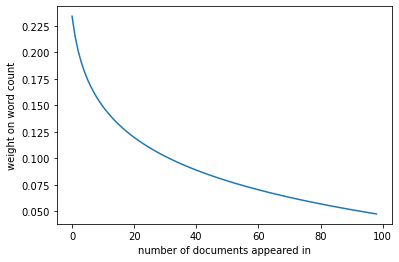

In [ ]:
import numpy as np
dfs = np.array(range(1,100))
idf = np.log(n/(1+dfs)) + 1

idf = idf / np.linalg.norm(idf)
    
plt.plot(idf)
plt.xlabel('number of documents appeared in')
plt.ylabel('weight on word count')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words = 'english', min_df = 0.3)
corpus_tf = tfidf.fit_transform(corpus)
feats = tfidf.get_feature_names()

corpus_array = corpus_tf.toarray()

df = pd.DataFrame(corpus_array, columns = feats, index = sources)
df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,according,added,afternoon,airport,amid,appeared,asked,associated,austin,boil,cancelled,cancun,care,carlton,centers,chairman,circulating,city,cnn,cold,come,comment,communication,confirmed,congress,constant,constituents,continue,continued,crisis,cruz,dad,daughters,day,days,defense,democrat,democrats,department,did,...,senator,situation,social,source,staff,state,statement,stay,storm,storms,team,ted,temperatures,test,texans,texas,think,thursday,time,times,told,travel,trip,trump,trying,tweeted,twitter,using,vacation,ve,want,wanting,warm,water,weather,wednesday,week,winter,wouldn,wrote
fox,0.137018,0.068509,0.131950,0.043983,0.113738,0.000000,0.052103,0.075886,0.000000,0.000000,0.068509,0.131950,0.000000,0.000000,0.000000,0.000000,0.075886,0.075886,0.000000,0.000000,0.000000,0.000000,0.052103,0.068509,0.000000,0.052103,0.000000,0.062272,0.000000,0.113738,0.404626,0.043983,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.095680,0.000000,0.137018,0.137018,0.052103,0.219917,0.131950,0.000000,0.056869,0.000000,0.075886,0.040463,0.056869,0.000000,0.131950,0.202313,0.000000,0.239199,0.000000,0.000000,0.052103,0.000000,0.121388,0.000000,0.000000,0.000000,0.000000,0.075886,0.000000,0.000000,0.052103,0.047840,0.056869,0.052103,0.075886,0.056869,0.175933,0.087967,0.000000,0.000000
nbc,0.000000,0.034687,0.066807,0.089076,0.000000,0.000000,0.079140,0.000000,0.038422,0.000000,0.034687,0.022269,0.031529,0.000000,0.000000,0.000000,0.038422,0.000000,0.038422,0.000000,0.069373,0.038422,0.026380,0.034687,0.034687,0.026380,0.028793,0.031529,0.000000,0.000000,0.430217,0.022269,0.086379,0.028793,0.026380,0.000000,0.000000,0.034687,0.069373,0.038422,...,0.000000,0.038422,0.069373,0.034687,0.052760,0.133614,0.089076,0.189172,0.086379,0.034687,0.038422,0.040973,0.028793,0.076844,0.200422,0.102433,0.063057,0.145330,0.104060,0.000000,0.052760,0.000000,0.102433,0.031529,0.026380,0.069373,0.000000,0.038422,0.076844,0.076844,0.079140,0.024222,0.086379,0.105520,0.000000,0.057586,0.089076,0.022269,0.034687,0.000000
epoch,0.000000,0.000000,0.043217,0.043217,0.055878,0.067315,0.051195,0.149127,0.000000,0.074564,0.000000,0.129650,0.061186,0.000000,0.000000,0.074564,0.074564,0.000000,0.074564,0.074564,0.000000,0.074564,0.051195,0.000000,0.067315,0.051195,0.055878,0.061186,0.000000,0.055878,0.397573,0.043217,0.000000,0.055878,0.102390,0.000000,0.000000,0.134630,0.000000,0.000000,...,0.047006,0.000000,0.134630,0.000000,0.051195,0.172867,0.043217,0.000000,0.000000,0.067315,0.000000,0.039757,0.111755,0.000000,0.086433,0.238544,0.000000,0.094012,0.067315,0.074564,0.051195,0.000000,0.119272,0.061186,0.051195,0.000000,0.074564,0.000000,0.000000,0.000000,0.051195,0.047006,0.055878,0.255974,0.000000,0.000000,0.043217,0.043217,0.000000,0.000000
OAN,0.000000,0.133918,0.000000,0.000000,0.111164,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085976,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.316376,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.401753,0.000000,0.000000,...,0.187029,0.000000,0.000000,0.133918,0.000000,0.171952,0.000000,0.000000,0.111164,0.000000,0.000000,0.079094,0.000000,0.000000,0.085976,0.395469,0.121725,0.000000,0.000000,0.000000,0.000000,0.000000,0.079094,0.121725,0.000000,0.000000,0.000000,0.000000,0.000000,0.148338,0.203696,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085976,0.000000,0.000000
breitbart,0.033485,0.000000,0.064492,0.042995,0.000000,0.000000,0.050932,0.074181,0.074181,0.037090,0.000000,0.085989,0.060872,0.037090,0.037090,0.000000,0.000000,0.000000,0.000000,0.000000,0.033485,0.000000,0.025466,0.000000,0.033485,0.025466,0.055591,0.000000,0.037090,0.083386,0.435084,0.021497,0.027795,0.083386,0.050932,0.037090,0.037090,0.033485,0.066969,0.037090,...,0.116911,0.037090,0.000000,0.000000,0.101864,0.150481,0.042995,0.030436,0.138976,0.033485,0.000000,0.059330,0.027795,0.07418

In [ ]:
word_sum_tf = df.sum(axis=0).sort_values(ascending=False)
word_sum_tf

cruz           4.504751
texas          2.210764
power          2.177386
said           2.050018
state          1.783628
                 ...   
response       0.187691
interview      0.186673
infuriating    0.183378
emerged        0.182055
situation      0.150217
Length: 171, dtype: float64

In [ ]:
N = 20

top_N_cv = word_sum_cv[0:N].index.tolist()
top_N_tf = word_sum_tf[0:N].index.tolist()

# printing two lists side by side
for x, y in zip(top_N_cv, top_N_tf):
    print(x,  y, sep = '\t')

cruz	cruz
said	texas
texas	power
power	said
state	state
thursday	thursday
trip	trip
texans	texans
week	senator
water	water
family	cancun
cancun	week
ted	flight
flight	ted
senator	family
houston	people
ted cruz	media
people	houston
home	news
statement	home


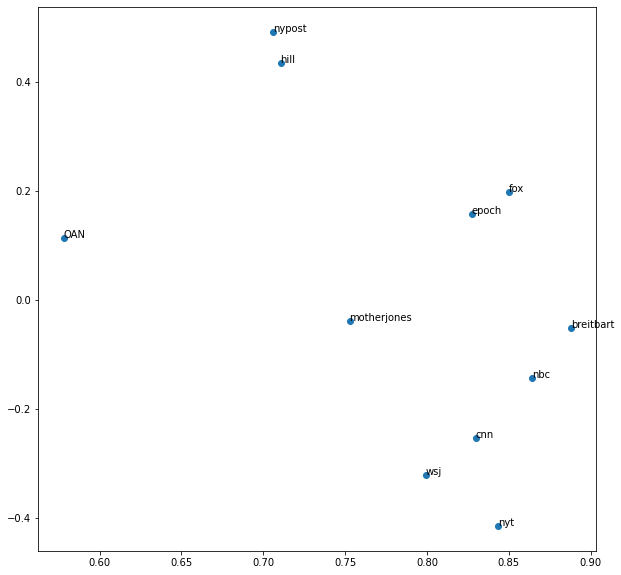

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

svd = TruncatedSVD(n_components=2)
X_r = svd.fit_transform(corpus_tf)

xs = [xs for xs, ys in X_r]
ys = [ys for xs, ys in X_r]

fig, ax = plt.subplots(figsize = (10,10))

ax.scatter(xs, ys)

for i, txt in enumerate(sources):
    ax.annotate(txt, (xs[i], ys[i]))

Compare to a Media Bias Chart: "https://www.adfontesmedia.com/wp-content/uploads/2021/02/Ad_Fontes_Media_Bias_Chart-1024x815.jpg"